# <p style="text-align: center;">Location and Logistic Regression and Others</p>

In [ ]:
make a map of the wrong prevision and see if there is a caracteristic

In [ ]:
faire utilisation de location latitude et mlongitude (2) dela commune avec different feature engineering (acale, et les deux autre truc de chat gpt)

In [ ]:
faire le mesh grid

In [ ]:
faire le dash

In [ ]:
faire le powerpoint

In [1]:
#!pip install cartopy
#!pip install imageio 

## Import libraries

In [2]:
import pandas as pd
import numpy as np

import glob
import os

import requests

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import zipfile

#import xarray as xr

import folium
from folium.plugins import MarkerCluster

import pandas as pd
#from geopy.geocoders import Nominatim

import geopandas as gpd
#import cartopy.crs as ccrs

#import imageio

from sklearn.neighbors import KDTree
from sklearn.neighbors import BallTree

## Set parameters

In [3]:
decree_filename_base = 'arrete_'
decrees_folder_name = './../../data/raw/decrees'
communes_folder_name = './../../data/raw/opendatasoft'
weather_folder_name = './../../data/raw/weather/era5'
weather_ncfiles_folder_name = './../../data/raw/weather/era5/ncfiles'
processed_data_folder_name = './../../data/processed'
maps_folder_name = './../../data/processed/maps'
decrees_filename = 'decrees.parquet'
decrees_locations_filename = 'decrees_locations.parquet'
communes_csv_filename = 'correspondance-code-insee-code-postal.csv'
weather_filename = 'weather.parquet'
weather_shema = 'weather_shema.csv'
weather_decrees_filename = 'weather_decrees.parquet'
weather_decrees_shema = 'weather_decrees.csv'
#weather_zip_file = "193fcd51a8958175843ecbbcaba057c8.zip"

## Load Weather data

| Column    | Description                                      |
|-----------|--------------------------------------------------|
| date      | The date of the observation.                     |
| latitude  | The latitude coordinate of the observation point.|
| longitude | The longitude coordinate of the observation point.|
| number    | A unique identifier for the observation.         |
| expver    | Experiment version number.                       |
| u10       | 10-meter U-component of wind (eastward wind).    |
| v10       | 10-meter V-component of wind (northward wind).   |
| t2m       | 2-meter temperature (air temperature at 2 meters above the surface).|
| sp        | Surface pressure.                                |
| tp        | Total precipitation.                             |
| e         | Evaporation.                                     |
| sro       | Surface runoff.                                  |
| tcrw      | Total column water vapor.                        |
| stl1      | Soil temperature level 1.                        |
| stl2      | Soil temperature level 2.                        |
| slt       | Soil type.                                       |
| swvl1     | Volumetric soil water layer 1.                   |
| swvl2     | Volumetric soil water layer 2.                   |
| cvh       | High vegetation cover.                           |
| cvl       | Low vegetation cover.                            |
| tvh       | High vegetation type.                            |
| tvl       | Low vegetation type.                             |


## Import Data

In [4]:
# read the dataframe from parquet
import pandas as pd

df = pd.read_parquet(os.path.join(processed_data_folder_name, weather_decrees_filename))




In [5]:
os.path.join(processed_data_folder_name, weather_decrees_shema)

'./../../data/processed/weather_decrees.csv'

In [6]:
# Load the schema (data types) from the file
schema = pd.read_csv(os.path.join(processed_data_folder_name, weather_decrees_shema), index_col=0).squeeze("columns")

In [7]:
# Apply the schema to the loaded dataframe
df = df.astype(schema.to_dict())

In [8]:
df.head()

,date_1,latitude_1,longitude_1,u10_1,v10_1,t2m_1,sp_1,tp_1,e_1,sro_1,...,Code Arrondissement_2,Code Département_2,Code Région_2,start_event_year_2,latitude_2,longitude_2,year_2,latitude_rad_2,longitude_rad_2,distance_km
201,1990-01-01,51.25,2.50,4.651482,6.094338,7.558984,101673.1875,0.002449,-0.001736,3.814697e-06,...,4.0,59,31.0,1989,51.073044,2.527649,1990,0.891393,0.044116,19.770879
254,1990-01-01,51.00,1.50,5.272575,6.298440,8.234766,101567.1875,0.003467,-0.001933,9.536743e-07,...,3.0,62,31.0,1990,50.888336,1.682486,1990,0.888169,0.029365,17.822208
255,1990-01-01,51.00,1.75,4.917595,6.070413,7.896875,101591.1875,0.003078,-0.001807,1.049042e-05,...,6.0,62,31.0,1989,50.950207,1.875756,1990,0.889249,0.032738,10.400898
256,1990-01-01,51.00,2.00,3.881462,4.989358,7.142969,101607.1875,0.002492,-0.001066,3.910065e-05,...,5.0,62,31.0,1990,50.981233,2.039307,1990,0.889790,0.035593,3.453043
257,1990-01-01,51.00,2.25,3.224724,4.463479,6.730859,101649.1875,0.002129,-0.000822,4.005432e-05,...,4.0,59,31.0,1989,51.001214,2.223048,1990,0.890139,0.038800,1.890829


In [9]:
df.columns

Index(['date_1', 'latitude_1', 'longitude_1', 'u10_1', 'v10_1', 't2m_1',
       'sp_1', 'tp_1', 'e_1', 'sro_1',
       ...
       'Code Arrondissement_2', 'Code Département_2', 'Code Région_2',
       'start_event_year_2', 'latitude_2', 'longitude_2', 'year_2',
       'latitude_rad_2', 'longitude_rad_2', 'distance_km'],
      dtype='object', length=115)

In [10]:
features_column_name = [ 'latitude_1', 'longitude_1', 't2m_z_1', 'tp_z_1','swvl1_z_1','swvl2_z_1', 'e_z_1']
X = df[features_column_name]
X.head()

,latitude_1,longitude_1,t2m_z_1,tp_z_1,swvl1_z_1,swvl2_z_1,e_z_1
201,51.25,2.50,0.952558,-0.062029,-0.840825,-0.940191,0.166092
254,51.00,1.50,1.117975,0.304774,-0.347817,-0.544746,0.453043
255,51.00,1.75,1.014796,0.293028,-0.790490,-0.965916,0.298279
256,51.00,2.00,0.886684,0.364226,-0.820262,-0.986800,-0.370528
257,51.00,2.25,0.836876,0.230374,-0.839300,-0.985479,-0.683488


In [11]:
df['code_peril_2'].value_counts()

code_peril_2
ICB    179408
SEC    160824
MVT     19968
CMV      7060
SEI      5900
IRN      3812
GLT      2352
VCY      1264
AVA      1080
ECB       540
EFA       480
PDN        84
LVT        72
DIV        48
COB        36
GRL        36
RAZ        24
GET        12
Name: count, dtype: int64

In [12]:
# Create drought_flag column without causing fragmentation
drought_flag = df['code_peril_2'].apply(lambda x: 1 if x == 'SEC' else 0)
# avoid framentation
df = pd.concat([df, drought_flag.rename('drought_flag')], axis=1)



In [13]:
df['drought_flag'] .head()

201    1
254    0
255    1
256    1
257    1
Name: drought_flag, dtype: int64

In [14]:
df['drought_yearly_flag'] = df.groupby(['year_2','Code Commune_2'])['drought_flag'].transform('max')

In [15]:
df['drought_yearly_flag'].head()

201    1
254    0
255    1
256    1
257    1
Name: drought_yearly_flag, dtype: int64

In [16]:
y = df['drought_yearly_flag']

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

'''
# Sample dataframe
data = {
    'latitude': [34.05, 36.16, 40.71, 34.05, 36.16, 40.71],
    'longitude': [-118.24, -115.15, -74.00, -118.24, -115.15, -74.00],
    'temperature': [20, 25, 30, 22, 26, 28],
    'precipitation': [100, 50, 30, 110, 60, 40],
    'date': pd.date_range(start='1/1/2020', periods=6, freq='M'),
    'drought_flag': [0, 1, 0, 0, 1, 0]
}
'''
#df = pd.DataFrame(data)

# Feature selection
#X = df[['latitude_1', 'longitude_1', 'tp_delta_1', 'tp_delta_1']]
#y = df['drought_flag']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the logistic regression model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict_proba(X_test)

# Evaluating the model
y_class_pred = 1 * (y_pred[:, 1] >= 0.45)
print("Accuracy:", accuracy_score(y_test, y_class_pred))
print("Classification Report:\n", classification_report(y_test, y_class_pred))


Accuracy: 0.6439033942558747
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.05      0.10     27822
           1       0.65      0.98      0.78     48778

    accuracy                           0.64     76600
   macro avg       0.63      0.52      0.44     76600
weighted avg       0.63      0.64      0.53     76600



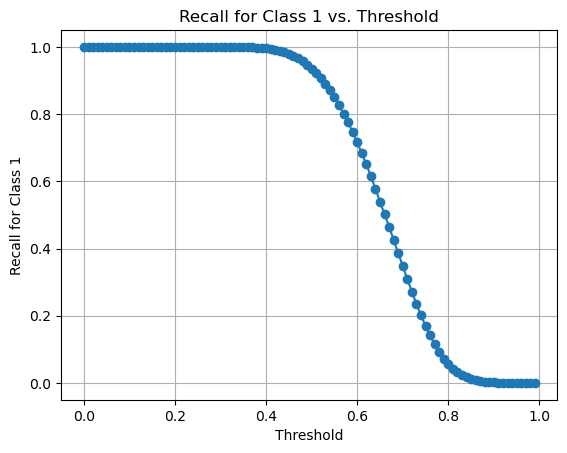

Accuracy: 0.6439033942558747
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.05      0.10     27822
           1       0.65      0.98      0.78     48778

    accuracy                           0.64     76600
   macro avg       0.63      0.52      0.44     76600
weighted avg       0.63      0.64      0.53     76600



In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, recall_score
import matplotlib.pyplot as plt
'''
# Sample dataframe
data = {
    'latitude': [34.05, 36.16, 40.71, 34.05, 36.16, 40.71],
    'longitude': [-118.24, -115.15, -74.00, -118.24, -115.15, -74.00],
    'temperature': [20, 25, 30, 22, 26, 28],
    'precipitation': [100, 50, 30, 110, 60, 40],
    'date': pd.date_range(start='1/1/2020', periods=6, freq='M'),
    'drought_flag': [0, 1, 0, 0, 1, 0]
}

df = pd.DataFrame(data)

# Feature selection
X = df[['latitude', 'longitude', 'temperature', 'precipitation']]
y = df['drought_flag']
'''
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the logistic regression model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict_proba(X_test)

# Grid search on threshold
thresholds = np.arange(0.0, 1.0, 0.01)
recalls = []

for threshold in thresholds:
    y_class_pred = (y_pred[:, 1] >= threshold).astype(int)
    recall = recall_score(y_test, y_class_pred)
    recalls.append(recall)

# Plotting the recall for class 1 according to the threshold
plt.plot(thresholds, recalls, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Recall for Class 1')
plt.title('Recall for Class 1 vs. Threshold')
plt.grid(True)
plt.show()

# Evaluating the model at a specific threshold (e.g., 0.45)
threshold = 0.45
y_class_pred = (y_pred[:, 1] >= threshold).astype(int)
print("Accuracy:", accuracy_score(y_test, y_class_pred))
print("Classification Report:\n", classification_report(y_test, y_class_pred))


In [19]:
threshold = 0.41
y_class_pred = (y_pred[:, 1] >= threshold).astype(int)
print("Accuracy:", accuracy_score(y_test, y_class_pred))
print("Classification Report:\n", classification_report(y_test, y_class_pred))

Accuracy: 0.638485639686684
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.02      0.03     27822
           1       0.64      0.99      0.78     48778

    accuracy                           0.64     76600
   macro avg       0.61      0.50      0.40     76600
weighted avg       0.62      0.64      0.51     76600



In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [21]:
#X = df[[ 'latitude_1', 'longitude_1', 't2m_delta_1', 'tp_delta_1','swvl1_delta_1','swvl2_delta_1']]

In [22]:
# df['t2m_delta_1_yearly_sum'] = df.groupby(['year_2','Code Commune_2'])['t2m_delta_1'].transform('sum')

In [23]:
# df['t2m_delta_1_yearly_mean'] = df.groupby(['year_2','Code Commune_2'])['t2m_delta_1'].transform('mean')

In [24]:
# df['tp_delta_1_yearly_sum'] = df.groupby(['year_2','Code Commune_2'])['tp_delta_1'].transform('sum')

In [25]:
# df['tp_delta_1_yearly_mean'] = df.groupby(['year_2','Code Commune_2'])['tp_delta_1'].transform('mean')

In [26]:
import pandas as pd

# Assuming df is your DataFrame and features_column_name is your list of monthly features

monthly_features = [feature for feature in features_column_name if feature not in ['latitude_1', 'longitude_1']]

for feature in features_column_name:
    df[f'{feature}_yearly_sum'] = df.groupby(['year_2', 'Code Commune_2'])[feature].transform('sum')
    df[f'{feature}_yearly_mean'] = df.groupby(['year_2', 'Code Commune_2'])[feature].transform('mean')


In [27]:
# yearly features
yearly_features = [col for col in df.columns if col.endswith('_yearly_sum') or col.endswith('_yearly_mean')]
yearly_features

['latitude_1_yearly_sum',
 'latitude_1_yearly_mean',
 'longitude_1_yearly_sum',
 'longitude_1_yearly_mean',
 't2m_z_1_yearly_sum',
 't2m_z_1_yearly_mean',
 'tp_z_1_yearly_sum',
 'tp_z_1_yearly_mean',
 'swvl1_z_1_yearly_sum',
 'swvl1_z_1_yearly_mean',
 'swvl2_z_1_yearly_sum',
 'swvl2_z_1_yearly_mean',
 'e_z_1_yearly_sum',
 'e_z_1_yearly_mean']

In [28]:
df_year = df[['latitude_1', 'longitude_1', 'Code Commune_2', 'year_2']  + yearly_features + ['drought_yearly_flag']].copy()

In [29]:
df_year.drop_duplicates(inplace=True)

In [36]:
X = df_year[['latitude_1', 'longitude_1', 'Code Commune_2', 'year_2']  + yearly_features ]
X = df_year[yearly_features]

In [37]:
Y=df_year['drought_yearly_flag']

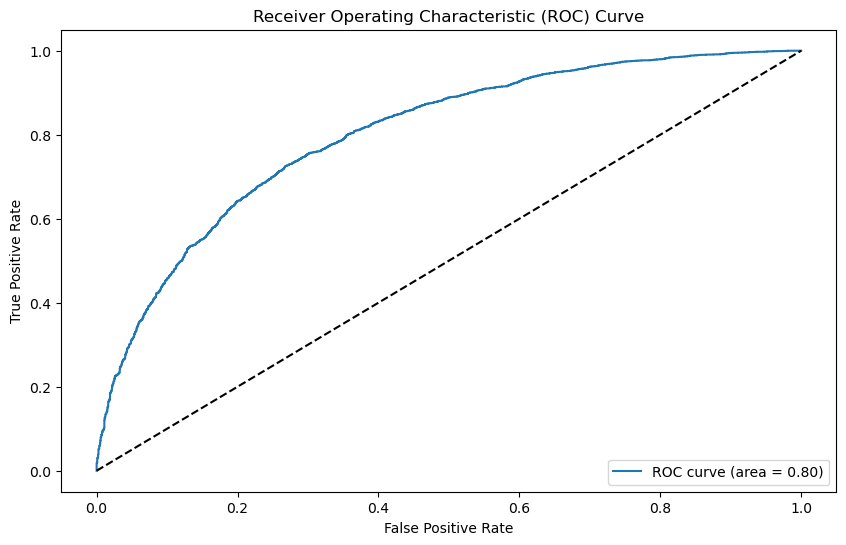

Best Threshold: 0.6290691817657418
Accuracy: 0.73


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

# Assuming df_year is already defined
#X = df_year[['latitude_1', 'longitude_1', 't2m_delta_1_yearly_sum', 't2m_delta_1_yearly_mean', 'tp_delta_1_yearly_sum', 'tp_delta_1_yearly_mean']]
#Y = df_year['drought_yearly_flag']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create a pipeline with standardization and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

# Fit the model
pipeline.fit(X_train, Y_train)

# Predict probabilities
Y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)
roc_auc = roc_auc_score(Y_test, Y_pred_prob)

# Find the best threshold
best_threshold = thresholds[np.argmax(tpr - fpr)]

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Predict using the best threshold
Y_pred_best = (Y_pred_prob >= best_threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred_best)
print(f'Best Threshold: {best_threshold}')
print(f'Accuracy: {accuracy:.2f}')


In [33]:
# Show classification report
print(classification_report(Y_test, Y_pred_best))

              precision    recall  f1-score   support

           0       0.60      0.73      0.66      3477
           1       0.83      0.73      0.77      6150

    accuracy                           0.73      9627
   macro avg       0.71      0.73      0.72      9627
weighted avg       0.75      0.73      0.73      9627



In [32]:
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline with standardization and random forest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Define parameter grid for grid search
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(pipeline_rf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, Y_train)

# Best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Predict probabilities
Y_pred_prob_rf = grid_search.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, Y_pred_prob_rf)
roc_auc_rf = roc_auc_score(Y_test, Y_pred_prob_rf)

# Find the best threshold
best_threshold_rf = thresholds_rf[np.argmax(tpr_rf - fpr_rf)]

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Predict using the best threshold
Y_pred_best_rf = (Y_pred_prob_rf >= best_threshold_rf).astype(int)

# Calculate accuracy
accuracy_rf = accuracy_score(Y_test, Y_pred_best_rf)
print(f'Best Threshold: {best_threshold_rf}')
print(f'Accuracy: {accuracy_rf:.2f}')

# Show classification report
print(classification_report(Y_test, Y_pred_best_rf))


KeyboardInterrupt: 

Best Parameters: {'xgb__learning_rate': 0.2, 'xgb__max_depth': 7, 'xgb__n_estimators': 200, 'xgb__subsample': 1.0}


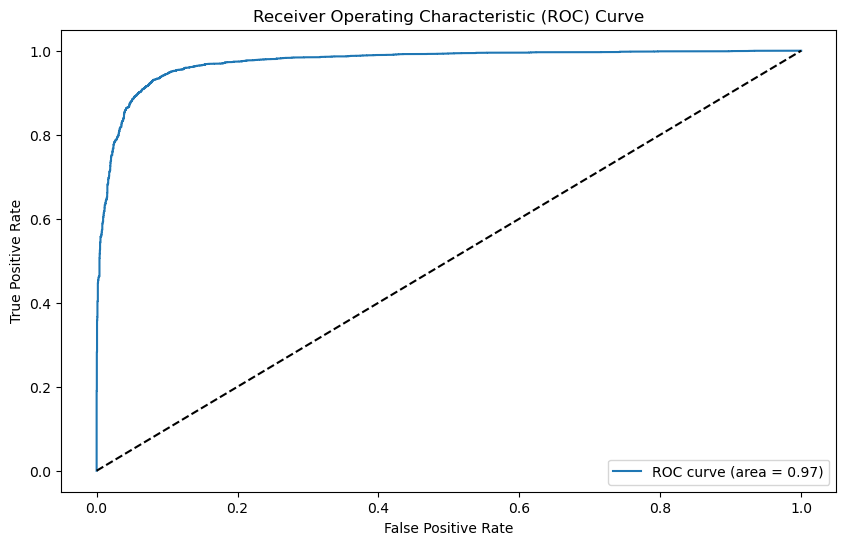

Best Threshold: 0.6161346435546875
Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      3477
           1       0.95      0.93      0.94      6150

    accuracy                           0.93      9627
   macro avg       0.92      0.93      0.92      9627
weighted avg       0.93      0.93      0.93      9627



In [34]:
from xgboost import XGBClassifier

# Create a pipeline with standardization and XGBoost
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Define parameter grid for grid search
param_grid_xgb = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.8, 1.0]
}

# Perform grid search
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='roc_auc')
grid_search_xgb.fit(X_train, Y_train)

# Best parameters
best_params_xgb = grid_search_xgb.best_params_
print(f'Best Parameters: {best_params_xgb}')

# Predict probabilities
Y_pred_prob_xgb = grid_search_xgb.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(Y_test, Y_pred_prob_xgb)
roc_auc_xgb = roc_auc_score(Y_test, Y_pred_prob_xgb)

# Find the best threshold
best_threshold_xgb = thresholds_xgb[np.argmax(tpr_xgb - fpr_xgb)]

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Predict using the best threshold
Y_pred_best_xgb = (Y_pred_prob_xgb >= best_threshold_xgb).astype(int)

# Calculate accuracy
accuracy_xgb = accuracy_score(Y_test, Y_pred_best_xgb)
print(f'Best Threshold: {best_threshold_xgb}')
print(f'Accuracy: {accuracy_xgb:.2f}')

# Show classification report
print(classification_report(Y_test, Y_pred_best_xgb))


              precision    recall  f1-score   support

           0       0.60      0.74      0.66      2318
           1       0.83      0.72      0.77      4100

    accuracy                           0.73      6418
   macro avg       0.71      0.73      0.72      6418
weighted avg       0.75      0.73      0.73      6418



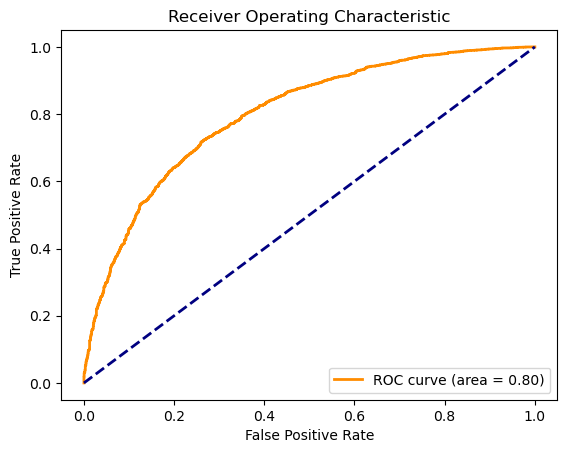

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_year is your DataFrame
#X = df_year[['latitude_1', 'longitude_1', 't2m_delta_1_yearly_sum', 't2m_delta_1_yearly_mean', 'tp_delta_1_yearly_sum', 'tp_delta_1_yearly_mean']]
#Y = df_year['drought_yearly_flag']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression())
])

# Fit the model
pipeline.fit(X_train, Y_train)

# Predict probabilities
Y_prob = pipeline.predict_proba(X_test)[:, 1]

# Find the best threshold
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Predict with the best threshold
Y_pred = (Y_prob >= optimal_threshold).astype(int)

# Classification report
print(classification_report(Y_test, Y_pred))

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



In [39]:
#!pip install optuna

[I 2024-10-10 18:55:42,362] A new study created in memory with name: no-name-ee462078-8351-4b4a-9477-e951390b4602


[I 2024-10-10 18:55:43,151] Trial 0 finished with value: 0.7891810118058039 and parameters: {'n_estimators': 58, 'max_depth': 2, 'min_samples_split': 3, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.7891810118058039.
[I 2024-10-10 18:55:45,184] Trial 1 finished with value: 0.8102194385403734 and parameters: {'n_estimators': 109, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.8102194385403734.
[I 2024-10-10 18:55:57,298] Trial 2 finished with value: 0.9708917485637324 and parameters: {'n_estimators': 196, 'max_depth': 29, 'min_samples_split': 3, 'min_samples_leaf': 6}. Best is trial 2 with value: 0.9708917485637324.
[I 2024-10-10 18:56:05,216] Trial 3 finished with value: 0.9798743660430566 and parameters: {'n_estimators': 124, 'max_depth': 21, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 3 with value: 0.9798743660430566.
[I 2024-10-10 18:56:11,118] Trial 4 finished with value: 0.9023388539321114 and parameters: {'n

Best parameters: {'n_estimators': 200, 'max_depth': 31, 'min_samples_split': 2, 'min_samples_leaf': 1}


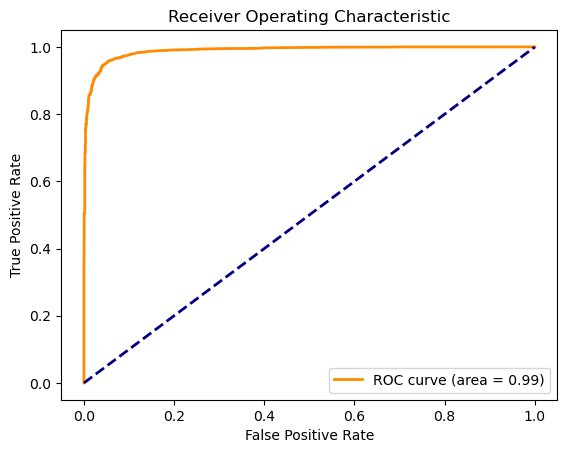

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2318
           1       0.96      0.97      0.96      4100

    accuracy                           0.95      6418
   macro avg       0.95      0.95      0.95      6418
weighted avg       0.95      0.95      0.95      6418



In [40]:
import optuna
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_year is your DataFrame
#X = df_year[['latitude_1', 'longitude_1', 't2m_delta_1_yearly_sum', 't2m_delta_1_yearly_mean', 'tp_delta_1_yearly_sum', 'tp_delta_1_yearly_mean']]
#Y = df_year['drought_yearly_flag']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define objective function for Optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('random_forest', RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        ))
    ])
    
    pipeline.fit(X_train, Y_train)
    Y_prob = pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, Y_prob)
    roc_auc = auc(fpr, tpr)
    
    return roc_auc

# Optimize hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Best parameters
best_params = study.best_params
print("Best parameters:", best_params)

# Train final model with best parameters
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestClassifier(
        n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        min_samples_split=best_params['min_samples_split'],
        min_samples_leaf=best_params['min_samples_leaf'],
        random_state=42
    ))
])

pipeline.fit(X_train, Y_train)
Y_prob = pipeline.predict_proba(X_test)[:, 1]

# Plot ROC curve
fpr, tpr, _ = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Classification report
Y_pred = (Y_prob >= 0.5).astype(int)
print(classification_report(Y_test, Y_pred))
